In [ ]:
# if you do not have them. Please install

#! easy_install fatsecret


In [ ]:
# if you do not have them. Please install

#! pip install fatsecret

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from fatsecret import Fatsecret
#from config import api_key - to put in git ignore. 

In [2]:
#Api Keys
consumer_key='a12a75d9e9d249a1ba18e07b67f05510'
consumer_secret='9b337097f25c44ba9eca8a7a9a6857e0'

In [3]:
# Format to get Data
fs=Fatsecret(consumer_key, consumer_secret)

In [4]:
####Blue Print

### food_search (high level: name, id, type) ---> food_get(detailed nutrition)



## Procedure


####food_search

##do a foods_search ['soda', 'dairy'.....'n']

##within food search results, append two lists; one for food_id, brand_name)

## dataframe (food_search_df) with food_id, brand_name 

#####food_id########brand_name
#####387673########Pepsi
#####567094########Sunkist

###food_get

##use food_Search_df to get detailed info; sugar

######for food_id in food_search_df['food_id']:
    #one-line
    ##### sugar = fs.foods_get(food_id)['sugar'].astype(float)
    
    ##multi-line
    ##### sugar = fs.foods_get(food_id)
    ##### sugar_content = sugar['sugar']
    ##### sugar_content_clean = sugar_content.astype(float)
    
    
    
    ##### food_id.append(food_id)
    ##### sugar.append(sugar)
    
    
## food_id = ['387673', '567094' ....'n']
## sugar = [2.0, 3.5, ..... n.n]

####sugar_df
#####food_id#######sugar
#####387673########2.0
#####567094########3.5


########final data

## final_df = food_search_df.merge(sugar_df, on='food_id')


####food_id######brand_name#######sugar
#####387673########Pepsi##########2.0
#####567094########Sunkist########3.5


#final_df.to_csv

In [5]:
#pprint(fs.foods_search("soda"))

food_groups = ['soda']


soda_data = fs.foods_search('soda')

pprint(soda_data)

[{'food_description': 'Per 100g - Calories: 38kcal | Fat: 0.01g | Carbs: 9.77g '
                      '| Protein: 0.07g',
  'food_id': '387673',
  'food_name': 'Soda',
  'food_type': 'Generic',
  'food_url': 'https://www.fatsecret.com/calories-nutrition/generic/soda'},
 {'brand_name': 'Pepsi',
  'food_description': 'Per 8 fl oz - Calories: 100kcal | Fat: 0.00g | Carbs: '
                      '28.00g | Protein: 0.00g',
  'food_id': '76090',
  'food_name': 'Pepsi',
  'food_type': 'Brand',
  'food_url': 'https://www.fatsecret.com/calories-nutrition/pepsi/pepsi'},
 {'brand_name': 'Sunkist',
  'food_description': 'Per 1 can - Calories: 160kcal | Fat: 0.00g | Carbs: '
                      '44.00g | Protein: 0.00g',
  'food_id': '62638',
  'food_name': 'Orange Soda (Can)',
  'food_type': 'Brand',
  'food_url': 'https://www.fatsecret.com/calories-nutrition/sunkist/orange-soda-(can)'},
 {'food_description': 'Per 100g - Calories: 38kcal | Fat: 0.02g | Carbs: 9.78g '
                      '| P

In [6]:
#Pulling 
brand_name = []
food_id = []

for brand in soda_data[1:]:
        
    
        brand_name.append(brand['food_name'])
        food_id.append(brand['food_id'])
    


In [7]:
#Printing New list

foods_search_df = pd.DataFrame({'Food_id': food_id , 'Brand': brand_name})

foods_search_df


,Food_id,Brand
0,76090,Pepsi
1,62638,Orange Soda (Can)
2,7494,Soft Drink
3,78931,Dr. Pepper (20 oz)
4,62739,Sprite
5,37903,Cola Soda (with Caffeine)
6,96821,Mountain Dew (16 oz)
7,37795,Root Beer
8,7516,Cola Soft Drink
9,37768,Cream Soda


In [8]:
# searching for food id and returning sugar in Grams
sugar_list = []
food_id = []



for i in foods_search_df['Food_id']:
  
    sugar = fs.food_get(i)
    
    try:
        serving = sugar['servings']['serving']['sugar']
        food_id.append(i)
        sugar_list.append(serving)
    except:
        
        pass
    

In [9]:
#Printing New list

sugar_list_df = pd.DataFrame({'Food_id': food_id , 'Sugar': sugar_list})

sugar_list_df



,Food_id,Sugar
0,76090,28.00
1,62638,44.00
2,78931,65.00
3,62739,38.00
4,96821,44.00
5,63996,48.00
6,86324,29.00
7,93338,74.00
8,55458,28.00
9,63994,48.00


In [10]:
# Combine the data into a single dataset

soda_mergedata_df = pd.merge(foods_search_df, sugar_list_df, how="right", on=["Food_id", "Food_id"])




soda_mergedata_df["Sugar"] = soda_mergedata_df["Sugar"].astype(float)


soda_mergedata_df

,Food_id,Brand,Sugar
0,76090,Pepsi,28.0
1,62638,Orange Soda (Can),44.0
2,78931,Dr. Pepper (20 oz),65.0
3,62739,Sprite,38.0
4,96821,Mountain Dew (16 oz),44.0
5,63996,Cream Pure Cane Soda,48.0
6,86324,Strawberry Soda,29.0
7,93338,Orange Soda (Bottle),74.0
8,55458,Cherry Coke,28.0
9,63994,Crushed Melon Pure Cane Soda,48.0


In [11]:
# printing one product for graph

top_five_sugar = soda_mergedata_df.sort_values(by= ["Brand","Sugar"], ascending = False)

top_five = soda_mergedata_df.iloc[0]

top_five

Food_id    76090
Brand      Pepsi
Sugar         28
Name: 0, dtype: object

In [12]:
#pprint(fs.foods_search("soda"))

pprint(fs.foods_search("milk"))
food_groups = ['milk']



milk_data = fs.foods_search('milk')

pprint(milk_data)

[{'food_description': 'Per 100g - Calories: 60kcal | Fat: 3.25g | Carbs: 4.52g '
                      '| Protein: 3.22g',
  'food_id': '794',
  'food_name': 'Whole Milk',
  'food_type': 'Generic',
  'food_url': 'https://www.fatsecret.com/calories-nutrition/generic/milk-cows-fluid-whole'},
 {'food_description': 'Per 100g - Calories: 50kcal | Fat: 1.97g | Carbs: 4.68g '
                      '| Protein: 3.30g',
  'food_id': '800',
  'food_name': '2% Fat Milk',
  'food_type': 'Generic',
  'food_url': 'https://www.fatsecret.com/calories-nutrition/generic/milk-cows-fluid-2%25-fat'},
 {'food_description': 'Per 100g - Calories: 42kcal | Fat: 0.97g | Carbs: 4.99g '
                      '| Protein: 3.37g',
  'food_id': '803',
  'food_name': '1% Fat Milk',
  'food_type': 'Generic',
  'food_url': 'https://www.fatsecret.com/calories-nutrition/generic/milk-cows-fluid-1%25-fat'},
 {'food_description': 'Per 100g - Calories: 50kcal | Fat: 2.00g | Carbs: 4.71g '
                      '| Protein: 3.29

In [13]:
# Pulling data 

milk_name = []
milk_id = []

for brand in milk_data[1:]:
        
    
        milk_name.append(brand['food_name'])
        milk_id.append(brand['food_id'])

In [14]:
#Printing New list

milk_search_df = pd.DataFrame({'Food_id': milk_id , 'Brand': milk_name})

milk_search_df


,Food_id,Brand
0,800,2% Fat Milk
1,803,1% Fat Milk
2,793,Milk
3,804,Skim or Nonfat Milk (0.5% or Less Butterfat)
4,42046,Vitamin D Whole Milk
5,33820,Milk (Nonfat)
6,86784,2% Reduced Fat Milk
7,81796,1% Lowfat Milk
8,48789,Fat Free Skim Milk
9,68611,1% Milk


In [15]:
# searching for food id and returning sugar in Grams

msugar_list = []
milk_id = []



for i in milk_search_df['Food_id']:
  
    sugar = fs.food_get(i)
    
    try:
        serving = sugar['servings']['serving']['sugar']
        milk_id.append(i)
        msugar_list.append(serving)
    except:
        
        pass

In [16]:
#Printing New list

sugar_mlist_df = pd.DataFrame({'Food_id': milk_id , 'Sugar': msugar_list})

sugar_mlist_df

,Food_id,Sugar
0,42046,11.00
1,86784,12.00
2,81796,12.00
3,48789,6.00
4,68611,12.00
5,169490,12.00
6,64111,11.00
7,41294,11.00
8,86028,12.00
9,1997815,0


In [17]:
# Combine the data into a single dataset

milk_mergedata_df = pd.merge(milk_search_df, sugar_mlist_df, how="right", on=["Food_id", "Food_id"])


milk_mergedata_df["Sugar"] = milk_mergedata_df["Sugar"].astype(float)


milk_mergedata_df

,Food_id,Brand,Sugar
0,42046,Vitamin D Whole Milk,11.0
1,86784,2% Reduced Fat Milk,12.0
2,81796,1% Lowfat Milk,12.0
3,48789,Fat Free Skim Milk,6.0
4,68611,1% Milk,12.0
5,169490,Lactose Free Whole Milk,12.0
6,64111,Vitamin D Milk,11.0
7,41294,Fat Free Skim Milk with Vitamins A & D,11.0
8,86028,Fat Free Milk,12.0
9,1997815,Almond Milk Unsweetened Vanilla,0.0


In [18]:
# printing one product for graph

top_five_msugar = milk_mergedata_df.iloc[0]

top_five_msugar

Food_id                   42046
Brand      Vitamin D Whole Milk
Sugar                        11
Name: 0, dtype: object

In [23]:
# pulling data for rolls and printing list

food_groups = ['Rolls']

rolls_data = fs.foods_search('Rolls')

pprint(rolls_data)

[{'food_description': 'Per 100g - Calories: 300kcal | Fat: 7.30g | Carbs: '
                      '50.40g | Protein: 8.40g',
  'food_id': '39048',
  'food_name': 'Dinner Rolls',
  'food_type': 'Generic',
  'food_url': 'https://www.fatsecret.com/calories-nutrition/usda/dinner-rolls'},
 {'brand_name': 'Rhodes',
  'food_description': 'Per 1 roll - Calories: 100kcal | Fat: 1.50g | Carbs: '
                      '19.00g | Protein: 2.00g',
  'food_id': '1608576',
  'food_name': 'White Dinner Rolls',
  'food_type': 'Brand',
  'food_url': 'https://www.fatsecret.com/calories-nutrition/rhodes/white-dinner-rolls'},
 {'brand_name': "Schwebel's",
  'food_description': 'Per 1 roll - Calories: 160kcal | Fat: 1.50g | Carbs: '
                      '30.00g | Protein: 6.00g',
  'food_id': '58366',
  'food_name': 'Kaiser Rolls',
  'food_type': 'Brand',
  'food_url': 'https://www.fatsecret.com/calories-nutrition/schwebels/kaiser-rolls'},
 {'brand_name': 'Acme',
  'food_description': 'Per 1 roll - Calories

In [24]:
# Pulling data 

rolls_name = []
rolls_id = []

for brand in rolls_data[1:]:
        
    
        rolls_name.append(brand['food_name'])
        rolls_id.append(brand['food_id'])
        

In [25]:
#Printing New list

rolls_search_df = pd.DataFrame({'Food_id': rolls_id , 'Brand': rolls_name})

rolls_search_df

,Food_id,Brand
0,1608576,White Dinner Rolls
1,58366,Kaiser Rolls
2,42657,Hoagie Rolls
3,3428,Roll (Home Recipe or Bakery)
4,2427973,Italian Roll
5,39054,French Rolls
6,39055,Hamburger or Hotdog Rolls
7,210145,Hawaiian Dinner Rolls
8,3502,Toasted Hard White Roll
9,3496,Soft White Roll


In [26]:
# searching for food id and returning sugar in Grams

rolls_list = []
rolls_id = []



for i in rolls_search_df['Food_id']:
  
    sugar = fs.food_get(i)
    
    try:
        serving = sugar['servings']['serving']['sugar']
        rolls_id.append(i)
        rolls_list.append(serving)
    except:
        
        pass

In [27]:
#Printing New list

sugar_rlist_df = pd.DataFrame({'Food_id': rolls_id , 'Sugar': rolls_list})

sugar_rlist_df

,Food_id,Sugar
0,1608576,2.00
1,58366,2.00
2,42657,1.00
3,2427973,1.00
4,210145,4.00
5,395279,4.00
6,63021,2.00
7,111973,20.00


In [28]:
# Combine the data into a single dataset

rolls_mergedata_df = pd.merge(rolls_search_df, sugar_rlist_df, how="right", on=["Food_id", "Food_id"])

rolls_mergedata_df["Sugar"] = rolls_mergedata_df["Sugar"].astype(float)


rolls_mergedata_df

,Food_id,Brand,Sugar
0,1608576,White Dinner Rolls,2.0
1,58366,Kaiser Rolls,2.0
2,42657,Hoagie Rolls,1.0
3,2427973,Italian Roll,1.0
4,210145,Hawaiian Dinner Rolls,4.0
5,395279,Homestyle Yeast Rolls,4.0
6,63021,Deli Stadium Rolls,2.0
7,111973,Vanilla Frosted Coffee Roll,20.0


In [29]:
# printing one product for graph

top_five_rsugar = rolls_mergedata_df.sort_values("Sugar", ascending = False)

top_five_rsugar = rolls_mergedata_df.iloc[0]

top_five_rsugar

Food_id               1608576
Brand      White Dinner Rolls
Sugar                       2
Name: 0, dtype: object

In [30]:
# Printing Yogurt List

food_groups = ['Yogurt']

yogr_data = fs.foods_search('Yogurt')

pprint(yogr_data)

[{'food_description': 'Per 100g - Calories: 63kcal | Fat: 1.55g | Carbs: 7.04g '
                      '| Protein: 5.25g',
  'food_id': '845',
  'food_name': 'Plain Yogurt',
  'food_type': 'Generic',
  'food_url': 'https://www.fatsecret.com/calories-nutrition/generic/yogurt-plain'},
 {'brand_name': 'Yoplait',
  'food_description': 'Per 1 container - Calories: 90kcal | Fat: 0.00g | '
                      'Carbs: 16.00g | Protein: 5.00g',
  'food_id': '45421',
  'food_name': 'Light Fat Free Yogurt - Strawberry Banana',
  'food_type': 'Brand',
  'food_url': 'https://www.fatsecret.com/calories-nutrition/yoplait/light-fat-free-yogurt---strawberry-banana'},
 {'food_description': 'Per 100g - Calories: 99kcal | Fat: 1.15g | Carbs: '
                      '18.64g | Protein: 3.98g',
  'food_id': '844',
  'food_name': 'Yogurt',
  'food_type': 'Generic',
  'food_url': 'https://www.fatsecret.com/calories-nutrition/generic/yogurt'},
 {'brand_name': 'Dannon',
  'food_description': 'Per 1 container -

In [31]:
# Pulling data 

yogr_name = []
yogr_id = []

for brand in yogr_data[1:]:
        
    
        yogr_name.append(brand['food_name'])
        yogr_id.append(brand['food_id'])

In [32]:
#Printing New list

yogurt_search_df = pd.DataFrame({'Food_id': yogr_id , 'Brand': yogr_name})

yogurt_search_df

,Food_id,Brand
0,45421,Light Fat Free Yogurt - Strawberry Banana
1,844,Yogurt
2,26930,Light & Fit Yogurt - Cherry Vanilla
3,27165,Light Nonfat Yogurt
4,33788,Vanilla Yogurt (Lowfat)
5,846,Whole Milk Plain Yogurt
6,60740,Fruit on the Bottom Yogurt - Strawberry
7,27818,Total 0% Greek Yogurt
8,53233,Original 99% Fat Free Yogurt - Strawberry Bana...
9,51618,Oikos Organic Vanilla Greek Yogurt


In [33]:
# searching for food id and returning sugar in Grams

yogr_list = []
yogr_id = []



for i in yogurt_search_df['Food_id']:
  
    sugar = fs.food_get(i)
    
    try:
        serving = sugar['servings']['serving']['sugar']
        yogr_id.append(i)
        yogr_list.append(serving)
    except:
        
        pass

In [34]:
#Printing New list

sugar_yogr_list_df = pd.DataFrame({'Food_id': yogr_id , 'Sugar': yogr_list})

sugar_yogr_list_df

,Food_id,Sugar
0,45421,10.00
1,26930,10.00
2,27165,12.00
3,60740,21.00
4,27818,7.00
5,53233,18.00
6,51618,12.00
7,72532,4.00
8,31028,7.00
9,58984,18.00


In [35]:
# Combine the data into a single dataset

yogr_mergedata_df = pd.merge(yogurt_search_df, sugar_yogr_list_df, how="right", on=["Food_id", "Food_id"])

yogr_mergedata_df["Sugar"] = yogr_mergedata_df["Sugar"].astype(float)


yogr_mergedata_df

,Food_id,Brand,Sugar
0,45421,Light Fat Free Yogurt - Strawberry Banana,10.0
1,26930,Light & Fit Yogurt - Cherry Vanilla,10.0
2,27165,Light Nonfat Yogurt,12.0
3,60740,Fruit on the Bottom Yogurt - Strawberry,21.0
4,27818,Total 0% Greek Yogurt,7.0
5,53233,Original 99% Fat Free Yogurt - Strawberry Bana...,18.0
6,51618,Oikos Organic Vanilla Greek Yogurt,12.0
7,72532,Nonfat Plain Greek Yogurt (170g),4.0
8,31028,Light & Fit Yogurt - Peach (4 oz),7.0
9,58984,100 Calorie French Vanilla Yogurt,18.0


In [36]:
# printing one product for graph

top_five_ysugar = yogr_mergedata_df.sort_values("Sugar", ascending = False)


top_five_ysugar = yogr_mergedata_df.iloc[6]

top_five_ysugar

Food_id                                 51618
Brand      Oikos Organic Vanilla Greek Yogurt
Sugar                                      12
Name: 6, dtype: object

In [37]:
# Printing otherVegetables List

food_groups = ['other vegetable']

veg_data = fs.foods_search('other vegetable')

pprint(veg_data)

[{'brand_name': 'Taylor Farms',
  'food_description': 'Per 1 serving - Calories: 20kcal | Fat: 0.00g | Carbs: '
                      '5.00g | Protein: 1.00g',
  'food_id': '26670',
  'food_name': 'Vegetables',
  'food_type': 'Brand',
  'food_url': 'https://www.fatsecret.com/calories-nutrition/taylor-farms/vegetables'},
 {'food_description': 'Per 1087g - Calories: 402kcal | Fat: 1.74g | Carbs: '
                      '94.43g | Protein: 7.39g',
  'food_id': '6893',
  'food_name': 'Vegetable Relish',
  'food_type': 'Generic',
  'food_url': 'https://www.fatsecret.com/calories-nutrition/generic/vegetable-relish'},
 {'food_description': 'Per 818g - Calories: 1317kcal | Fat: 82.51g | Carbs: '
                      '112.68g | Protein: 34.59g',
  'food_id': '6787',
  'food_name': 'Vegetable Tempura',
  'food_type': 'Generic',
  'food_url': 'https://www.fatsecret.com/calories-nutrition/generic/vegetable-tempura'},
 {'food_description': 'Per 100g - Calories: 884kcal | Fat: 100.00g | Carbs: '
   

In [38]:
# Pulling data 

veg_name = []
veg_id = []

for brand in veg_data[1:]:
        
    
        veg_name.append(brand['food_name'])
        veg_id.append(brand['food_id'])

In [39]:
#Printing New list

veg_search_df = pd.DataFrame({'Food_id': veg_id , 'Brand': veg_name})

veg_search_df

,Food_id,Brand
0,6893,Vegetable Relish
1,6787,Vegetable Tempura
2,7048,Vegetable Oil
3,4406,Vegetable Macaroni
4,7036,Vegetable Shortening
5,3493,Vegetable Bread
6,5965041,Vegetable Frittata
7,4664664,Vegetable Empanadas
8,14724768,Vegetable Muffins
9,6908,Vegetable Soup (Home Recipe)


In [46]:
fs.food_get("6893")

{'food_id': '6893',
 'food_name': 'Vegetable Relish',
 'food_type': 'Generic',
 'food_url': 'https://www.fatsecret.com/calories-nutrition/generic/vegetable-relish',
 'servings': {'serving': [{'calcium': '2',
    'calories': '52',
    'carbohydrate': '12.17',
    'cholesterol': '0',
    'fat': '0.22',
    'fiber': '1.0',
    'iron': '3',
    'measurement_description': 'cup',
    'metric_serving_amount': '140.000',
    'metric_serving_unit': 'g',
    'monounsaturated_fat': '0.064',
    'number_of_units': '1.000',
    'polyunsaturated_fat': '0.105',
    'potassium': '248',
    'protein': '0.95',
    'saturated_fat': '0.049',
    'serving_description': '1 cup',
    'serving_id': '25322',
    'serving_url': 'https://www.fatsecret.com/calories-nutrition/generic/vegetable-relish?portionid=25322&portionamount=1.000',
    'sodium': '610',
    'sugar': '9.48',
    'vitamin_a': '2',
    'vitamin_c': '8'},
   {'calcium': '0',
    'calories': '3',
    'carbohydrate': '0.78',
    'cholesterol': '0',

In [40]:
# searching for food id and returning sugar in Grams

#veg_list = []
#veg_id = []



#for i in veg_search_df['Food_id']:
  
#    sugar = fs.food_get(i)
    
#    try:
#        serving = sugar['servings']['serving']['sugar']
#        veg_id.append(i)
#        veg_list.append(serving)
#    except:
        
#        pass

In [41]:
#Printing New list

#sugar_veg_list_df = pd.DataFrame({'Food_id': veg_id , 'Sugar': veg_list})

#sugar_veg_list_df

In [42]:
# Combine the data into a single dataset

#veg_mergedata_df = pd.merge(veg_search_df, sugar_veg_list_df, how="right", on=["Food_id", "Food_id"])

#veg_mergedata_df["Sugar"] = veg_mergedata_df["Sugar"].astype(float)


#veg_mergedata_df

In [43]:
# printing one product for graph

#top_five_ysugar = veg_mergedata_df.sort_values("Sugar", ascending = False)


#top_five_ysugar = veg_mergedata_df.iloc[6]


Text(0, 0.5, 'Grams of Sugar')

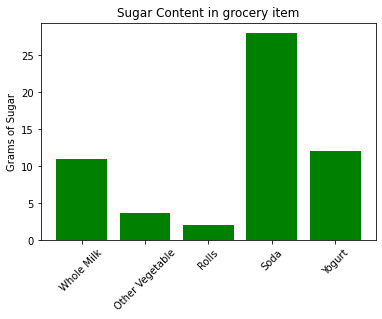

In [47]:
#Plot data in bar graph
categories = ["Whole Milk","Other Vegetable","Rolls","Soda", "Yogurt"]
bars_in_categories = [11,3.65 ,2, 28, 12]
x_axis = np.arange(len(bars_in_categories))
# Create a bar chart based upon the above data
plt.bar(x_axis, bars_in_categories, color="g", align="center" )
#xticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, categories, rotation=45)
plt.title("Sugar Content in grocery item")
plt.ylabel("Grams of Sugar")

In [45]:
plt.savefig("Sugar Content in grocery item.png")

<Figure size 432x288 with 0 Axes>